In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2xhdXJlbnQvTmV4dGNsb3VkL0xBVVJFTlQvTElWUkVTL3NpdGVfcmVncmVzc2lvbl9weXRob24vY29kZXM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/var/folders/rw/lcb4hvdj44z2zh_2scz_3xgh0000gq/T/ipykernel_17032/1555994662.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1728049825.3314297, "/opt/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1728049825.3348482, "/opt/miniconda3/lib/python3.12/zipimport.py": 1728049824.153947, "/opt/miniconda3/lib/python3.12/codecs.py": 1728049823.7001593, "/opt/miniconda3/lib/python3.12/encodings/aliases.py": 1728049824.5312598, "/opt/miniconda3/lib/python3.12/encodings/__init__.py": 1728049824.5277886, "/opt/miniconda3/lib/python3.12/encodings/utf_8.py": 1728049824.9295616, "/opt/miniconda3/lib/python3.12/abc.py": 1728049823.647853, "/opt/miniconda3/lib/python3.12/io.py": 1728049823.8195863, "/opt/miniconda3/lib/python3.12/stat.py": 1728049824.0119774, "/opt/miniconda3/lib/python3.12/_collections_abc.py": 1728049823.6009316, "/opt/miniconda3/lib/python3.12/genericpath.py": 1728049823.7784452, "/opt/miniconda3/lib/python3.12/posixpath.py": 1728049823.912881, "/opt/miniconda3/lib/python3.12/os.py": 1728049823.8794641, "/opt/miniconda3/lib/python3.

In [2]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
import sys
sys.path.append('../modules')
from ols_step_sk import LinearRegressionSelectionFeatureIC

In [3]:
ozone = pd.read_csv("../donnees/ozone.txt", header = 0, sep = ";", index_col=0).iloc[:,:10]
X = ozone.iloc[:,1:10]
y = ozone.iloc[:,:1]
reg = smf.ols('O3 ~ T12 + T15 + Ne12 + N12 + S12 + E12 + W12 + Vx + O3v', data=ozone).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     13.37
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           1.51e-09
Time:                        17:30:32   Log-Likelihood:                -194.43
No. Observations:                  50   AIC:                             408.9
Df Residuals:                      40   BIC:                             428.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.7278     17.279      3.167      0.003      19.806      89.650
T12           -0.3518      1.573     -0.224      0.824      -3.531       2.827
T15            1.4972      1.538      0.974      0.336      -1.611       4.605
Ne12          -4.1922      1.064     -3.941      0.000      -6.342      -2.042
N12            1.2755      1.363      0.936      0.355      -1.480       4.031
S12            3.1711      1.911      1.660      0.105      -0.691       7.033
E12            0.5277      1.943      0.272      0.787      -3.399       4.454
W12            2.4749      2.072      1.194      0.239      -1.713       6.663
Vx             0.6077      0.486      1.251      0.218      -0.374       1.589
O3v            0.2454      0.096      2.543      0.015       0.050       0.440
==============================================================================
Omnibus:                        0.252   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.364
Skew:                           0.153   Prob(JB):                        0.833
Kurtosis:                       2.716   Cond. No.                         859.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
mod_lin9v = LinearRegression()
mod_lin9v.fit(X,y)
np.round(mod_lin9v.coef_,2)

array([[-0.35,  1.5 , -4.19,  1.28,  3.17,  0.53,  2.47,  0.61,  0.25]])

In [5]:
reg_bic = LinearRegressionSelectionFeatureIC(crit="bic")
reg_bic.fit(X, y)
X.columns[reg_bic.selected_features_]

Index(['T15', 'Ne12', 'Vx', 'O3v'], dtype='object')

In [6]:
cr = StandardScaler()
acp = PCA(n_components=9)
pipe_acp = Pipeline(steps=[("cr", cr), ("acp", acp)])
pipe_acp.fit(X)
Xortho = pipe_acp.fit_transform(X)
reg_bic.fit(Xortho, y)
varsel = reg_bic.selected_features_
varsel

[0, 4]

In [7]:
step_cr = pipe_acp.named_steps["cr"]
stdX = step_cr.scale_
meanX = step_cr.mean_
coef_pcr =reg_bic.coef_
step_acp = pipe_acp.named_steps["acp"]
P = step_acp.components_[reg_bic.selected_features_,]
betafinpcr = P.T.dot(coef_pcr.T)[:,0]/stdX
intercept = y.mean(axis=0) - meanX.dot(betafinpcr.T)
np.round(np.append(intercept, betafinpcr),2)

array([ 5.279e+01,  4.100e-01,  4.700e-01, -2.540e+00, -8.700e-01,
        2.000e-02,  1.060e+00, -8.500e-01,  2.300e-01,  3.400e-01])

In [8]:
cr = StandardScaler()
acp = PCA()
reg = LinearRegression()
pipe_pcr = Pipeline(steps=[("cr", cr), ("acp", acp), ("reg", reg)])
param_grid_pcr = { "acp__n_components" : list(range(1,10))}
kf = KFold(n_splits=4, shuffle=True, random_state=0)
cv_pcr = GridSearchCV(pipe_pcr, param_grid_pcr, cv=kf, scoring = 'neg_mean_squared_error', n_jobs=3).fit(X, y)

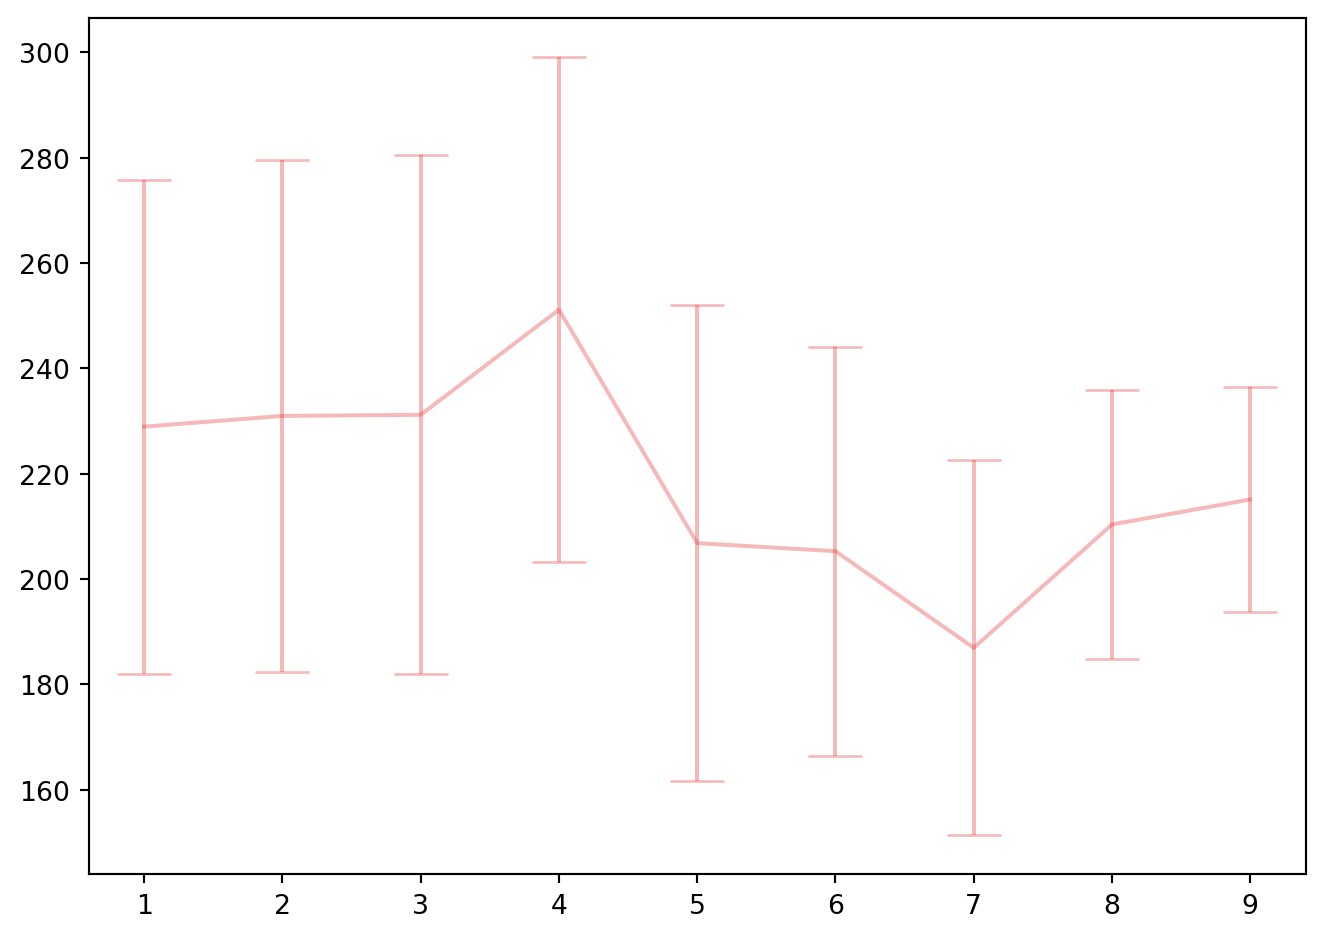

In [9]:
import matplotlib.cm as cm
colors = cm.Set1(range(1))
colors2 = colors
colors2[:,3] = colors2[:,3] -0.7
fig, ax1 = plt.subplots(1, 1)
ax1.errorbar(list(range(1,10)), -cv_pcr.cv_results_["mean_test_score"],
             cv_pcr.cv_results_["std_test_score"]/kf.n_splits**0.5 , capsize=10,  c=colors[0], ecolor=colors2[0])
fig.tight_layout()

In [10]:
bestpcr =  cv_pcr.best_estimator_
cv_pcr.best_params_
step_reg = bestpcr.named_steps["reg"]
coef_pcr = step_reg.coef_
step_cr =  bestpcr.named_steps["cr"]
stdX = step_cr.scale_
meanX = step_cr.mean_
step_acp = bestpcr.named_steps["acp"]
P = step_acp.components_
betafinpcr = P.T.dot(coef_pcr.T)[:,0]/stdX
intercept = y.mean(axis=0) - meanX.dot(betafinpcr.T)
np.round(np.append(intercept, betafinpcr),2)

array([58.33,  0.68,  0.44, -4.45,  1.24,  2.11,  1.84,  0.6 ,  0.15,
        0.25])

In [11]:
regpls = PLSRegression()
param_grid_pls = { "n_components" : list(range(1,10))}
kf = KFold(n_splits=4, shuffle=True, random_state=0)
cv_pls = GridSearchCV(regpls, param_grid_pls, cv=kf, scoring = 'neg_mean_squared_error').fit(X, y)

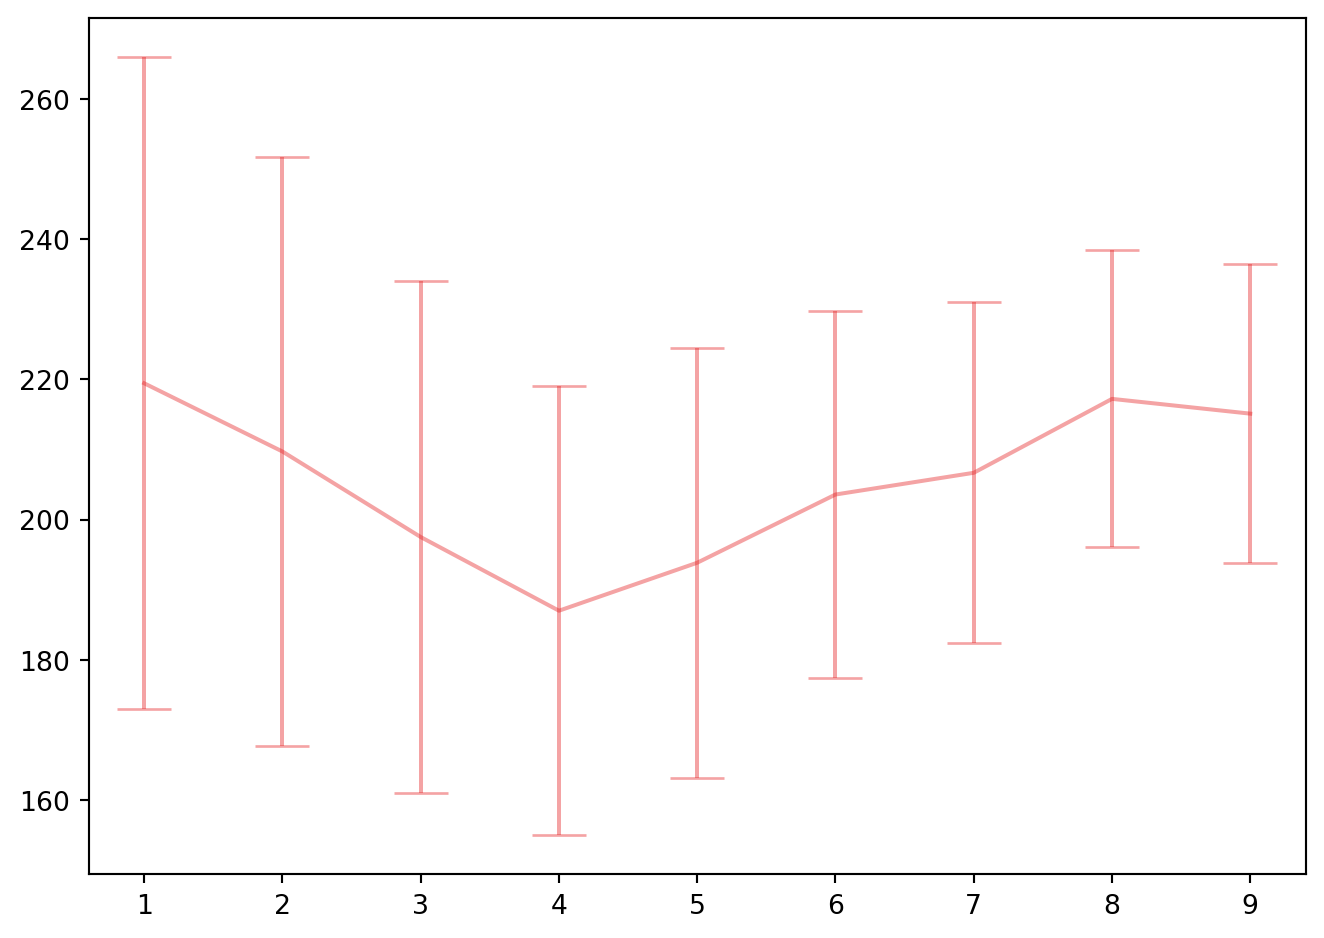

In [12]:
colors = cm.Set1(range(1))
colors2 = colors
colors2[:,3] = colors2[:,3] -0.6
fig, ax1 = plt.subplots(1, 1)
ax1.errorbar(list(range(1,10)), -cv_pls.cv_results_["mean_test_score"],  cv_pls.cv_results_["std_test_score"]/kf.n_splits**0.5 ,  capsize=10, c=colors[0], ecolor=colors2[0])
fig.tight_layout()

In [13]:
bestpls =  cv_pls.best_estimator_
cv_pls.best_params_
bestpls.fit(X,y)
bestpls.coef_

array([[ 0.41610174,  0.53217084, -4.4244714 ,  0.37042358,  1.60857405,
         0.98429296,  0.56053927,  0.24800203,  0.26473814]])

In [14]:
scalerX = StandardScaler().fit(X)
stdX = scalerX.scale_
meanX = scalerX.mean_
betafinpls = bestpls.coef_[:,0]/stdX
intercept = y.mean(axis=0) - meanX.dot(betafinpls.T)
np.append(intercept, betafinpls)

array([7.95723726e+01, 8.99163083e-02, 8.43936432e-02, 1.65784166e-01,
       1.98000066e-01, 2.80306490e-01, 1.88545955e-01, 1.71475028e-01,
       3.09237815e-02, 1.68441318e-02])